# Summary of Quantum Operations 
## Fundamentals
(revised by Amba Datt Pant, originaly created by Diwakar Sigdel)

## Qubit
- Regular or classical computer works on rules of logic - operation based on bits 0 or 1.
- qubit --> quantum bit that can follow quantum mechanics (rules of quantum mechanics). **0, 1 and intermediate state**
- Qubit has to be linked together by **superposition** and **quantum entanglement**. 

In [84]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector,plot_state_qsphere
import matplotlib.pyplot as plt

## Single Qubit Quantum states

A single qubit quantum state can be written as

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $\left|0\right\rangle$ is $|\alpha|^2$ and $\left|1\right\rangle$ is $|\beta|^2$. As a vector this is

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note due to conservation probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$ we only requires two real numbers to describe a single qubit quantum state.

A convenient representation is

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). **This is called the Bloch sphere representation of a qubit state.**

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

A general unitary must be able to take the $\left|0\right\rangle$ to the above state. That is 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary.

![img](https://www.datocms-assets.com/5203/1534934969-blochspphere.jpg?auto=compress&auto=quality&w=596)

-------

### Qubit flipping

#### 1.  $\psi = |0 \rangle;  \psi = \begin{bmatrix}  1 \\ 0  \end{bmatrix}$

- qiskit.visualization.plot_bloch_multivector \
(plots the Bloch sphere )
- **plot_bloch_multivector(state, title=' ', figsize=None, *, rho=None)**
- state (Statevector or DensityMatrix or ndarray) – an N-qubit quantum state.
- title (str) – a string that represents the plot title
- figsize (tuple) – Has no effect, here for compatibility only.
https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_multivector.html

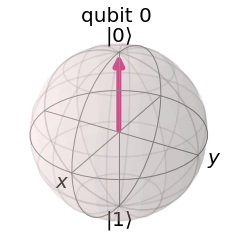

In [113]:
q = np.array([1.+0.j, 0.+0.j])
plot_bloch_multivector(q)

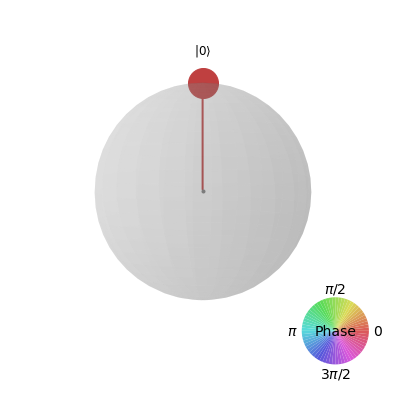

In [114]:
plot_state_qsphere(q)

- plot_state_qsphere(state, figsize=None, ax=None, show_state_labels=True, show_state_phases=False, use_degrees=False, *, rho=None)
- Plot the qsphere representation of a quantum state. 
- Here, the **size of the points is proportional to the probability of the corresponding term in the state and the color represents the phase**.
- https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html

#### 2.  $\psi = |1 \rangle;  \psi = \begin{bmatrix}  0 \\ 1  \end{bmatrix}$

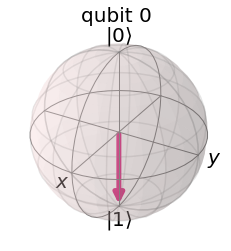

In [87]:
q = np.array([0.+0.j, 1.+0.j])
plot_bloch_multivector(q)

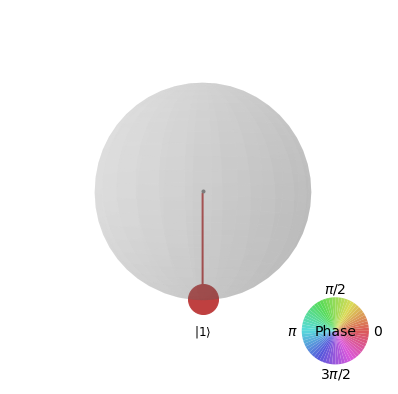

In [69]:
plot_state_qsphere(q)

#### Experiment 1:

- qc = **QuantumCircuit(n_q,n_b)**\
 (This quantum circuit called qc (here), is created by Qiskit using QuantumCircuit.)
- The **number n_q defines the number of qubits in the circuit**.
- The **n_b we define the number of output bits** we will extract from the circuit at the end.
- https://qiskit.org/textbook/ch-states/atoms-computation.html 
- The **dashed lines in the image** are just to **distinguish the different parts of the circuit** (although they can have more interesting uses too). They are made by using the **barrier** command.


Half adder using Qiskit to show simple outline of quantum circuit.
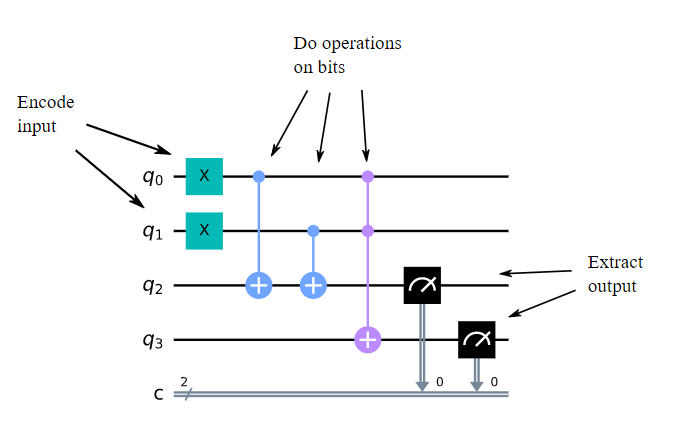

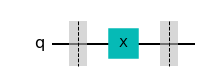

In [122]:
qc = QuantumCircuit(1)
qc.barrier()            # barrier --> distinguish the different parts of the circuit
qc1 = qc.copy()
qc.x(0)                 # x gate in 0 indexed qubit
#qc.h(1)                 # x gate in 0 indexed qubit
qc.barrier()
qc2 =qc.copy()
qc.draw('mpl') # mpl --> matplotlib

In [123]:
backend = Aer.get_backend('statevector_simulator')
q1 = execute(qc1,backend).result().get_statevector()
q2 = execute(qc2,backend).result().get_statevector()
print(q1,q2)

[1.+0.j 0.+0.j] [0.+0.j 1.+0.j]


------------------------------
### Aer.get_backend('name_of_simulator') 
- Aer can import using **from qiskit import Aer, execute**
- 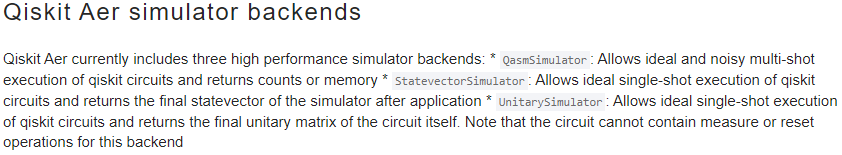
- https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html


- In Qiskit, we use **backend** to refer to the things on which quantum programs actually run (simulators or real quantum devices). To set up a job for a backend, we need to set up the corresponding backend object.

- The simulator we want is defined in the part of qiskit known as **Aer**. By giving the name of the simulator we want to the get_backend() method of Aer, we get the backend object we need. In this case, the name is '**statevector_simulator**'.

In [109]:
# A list of all possible simulators in Aer
Aer.backends()

[QasmSimulator(
 backend_name='qasm_simulator', provider=AerProvider()),
 StatevectorSimulator(
 backend_name='statevector_simulator', provider=AerProvider()),
 UnitarySimulator(
 backend_name='unitary_simulator', provider=AerProvider()),
 PulseSimulator(
 backend_name='pulse_simulator', provider=AerProvider())]

### Statevector
- statevectors to describe the state of the system

In [111]:
# position of a car along a track

 Classical system, x = 4 \
 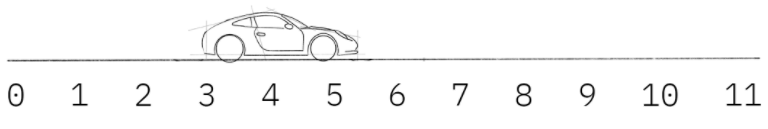

In terms of statevector ! https://qiskit.org/textbook/ch-states/representing-qubit-states.html
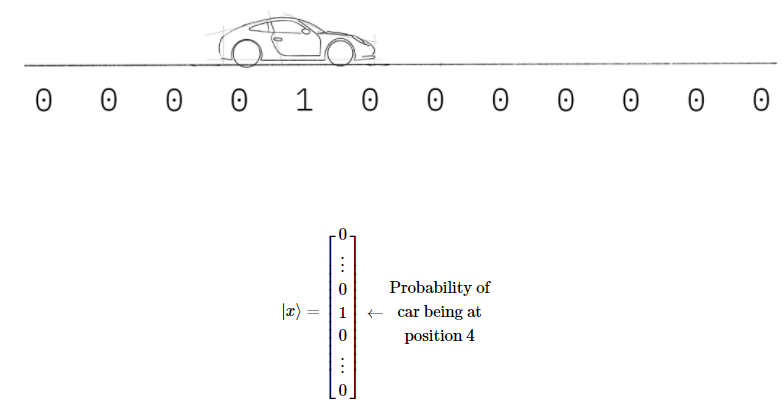

--------------------------------------------
### Superposition

#### 3.  $\psi =  \frac{1}{\sqrt{2}} |0\rangle  + \frac{1}{\sqrt{2}} |1 \rangle ; \psi = \frac{1}{\sqrt{2}}\begin{bmatrix}  1 \\ 1  \end{bmatrix}$ 

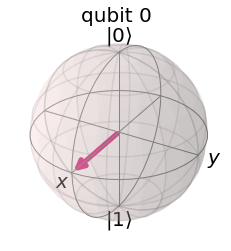

In [124]:
q = np.array([1/np.sqrt(2)+0.j, 1/np.sqrt(2)+0.j])   #input as complex number
plot_bloch_multivector(q)

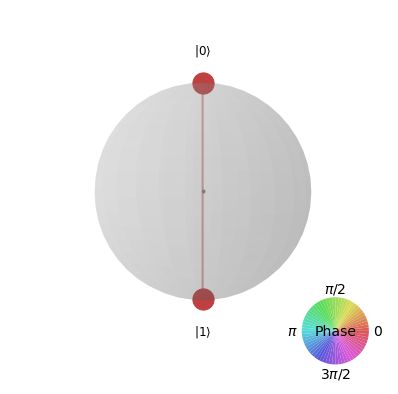

In [76]:
plot_state_qsphere(q)

#### 4.  $\psi =  \frac{1}{\sqrt{2}} |0\rangle  - \frac{1}{\sqrt{2}} |1 \rangle ; \psi = \frac{1}{\sqrt{2}}\begin{bmatrix}  1 \\ -1  \end{bmatrix}$ 

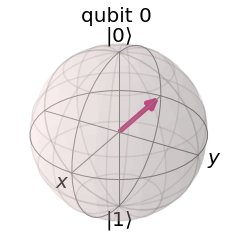

In [99]:
q = np.array([1/np.sqrt(2)+0.j, -(1/np.sqrt(2))+0.j])
plot_bloch_multivector(q)

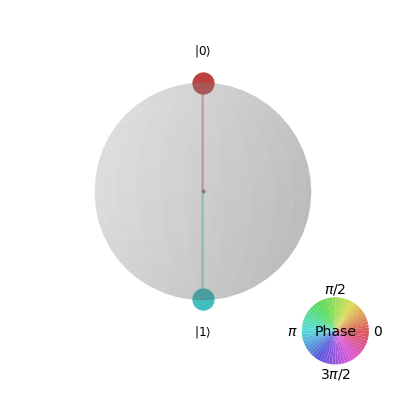

In [100]:
plot_state_qsphere(q)

#### Experiment 2 : 

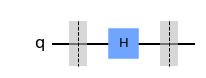

In [126]:
qc = QuantumCircuit(1)
qc.barrier()
qc1 = qc.copy()
qc.h(0)
qc.barrier()
qc2 =qc.copy()
qc.draw('mpl') # mpl -> matplotlib

 - $\psi_1 = |0 \rangle$ and  $\psi_2 =  \frac{1}{\sqrt{2}} |0\rangle  + \frac{1}{\sqrt{2}} |1 \rangle$

In [81]:
backend = Aer.get_backend('statevector_simulator')
q1 = execute(qc1,backend).result().get_statevector()
q2 = execute(qc2,backend).result().get_statevector()
print(q1,q2)

[1.+0.j 0.+0.j] [0.70710678+0.j 0.70710678+0.j]


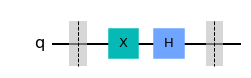

In [129]:
qc = QuantumCircuit(1)
qc.barrier()
qc1 = qc.copy()
qc.x(0)          # x-gate like NOT gate
qc.h(0)          # input Hadamard gate (h-gate)
qc.barrier()
qc2 =qc.copy()
qc.draw('mpl')

 - $\psi_1 = |1 \rangle$ and  $\psi_2 =  \frac{1}{\sqrt{2}} |0\rangle  - \frac{1}{\sqrt{2}} |1 \rangle$

In [83]:
backend = Aer.get_backend('statevector_simulator')
q1 = execute(qc1,backend).result().get_statevector()
q2 = execute(qc2,backend).result().get_statevector()
print(q1,q2)

[1.+0.j 0.+0.j] [ 0.70710678-8.65956056e-17j -0.70710678+8.65956056e-17j]


----------------------
- https://qiskit.org/textbook/preface.html

--------------------------------------
### Memo how to install Qutip and QisKit?

when you install Anaconda, tick/check on "Only me". If you check all users then it will need more setting in environment for installing Qutip.
- Open Anaconda Navigator
- Launch Powershell Prompt
- type: conda config --add channels conda-forge
- conda install qutip
- follow instruction (simply type y to proceed)
- you can check simply by running from qutip import * in jupyter notebook
- install qiskit
- type: pip install qiskit \
https://qiskit.org/documentation/install.html